#### Example 1. Group Anagrams: Given an array of strings strs, group the anagrams together. For example, given strs = ["eat","tea","tan","ate","nat","bat"], return [["bat"],["nat","tan"],["ate","eat","tea"]].

In [7]:
from collections import defaultdict

class Solution:
    def anagram(self, str):
        groups = defaultdict(list)

        for s in str:
            key = ''.join(sorted(s))
            groups[key].append(s)

        return groups.values()

In [8]:
sol = Solution()
result = sol.anagram(["eat","tea","tan","ate","nat","bat"])
print(result)

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])


> Given n as the length of strs and m as the average length of the strings, we iterate over each string and sort it, which costs O(n⋅m⋅logm). Then, we need to iterate over the keys. In the worst case scenario, when there are no matching anagrams, there will be n groups, which means this will cost O(n), giving an overall time complexity of O(n⋅m⋅logm) (the final +n is dominated). The space complexity is O(n⋅m) as each string will be placed in an array within the hash map.

#### Example 2. Minimum Consecutive Cards to Pick Up: Given an integer array cards, find the length of the shortest subarray that contains at least one duplicate. If the array has no duplicates, return -1.

In [9]:
class Solution:
    def consecutiveCards(self, cards):
        dic = defaultdict(int)
        ans = float('inf')

        for i in range(len(cards)):
            if cards[i] in dic:
                ans = min(ans, i - dic[cards[i]] + 1)
            else:
                dic[cards[i]] = i

        return ans if ans < float('inf') else -1

#### Example 3. Max Sum of a Pair With Equal Sum of Digits: Given an array of integers nums, find the maximum value of nums[i] + nums[j], where nums[i] and nums[j] have the same digit sum (the sum of their individual digits). Return -1 if there is no pair of numbers with the same digit sum.

In [10]:
class Solution:
    def pairSum(self, nums):
        def get_digit_sum(num):
            digit_sum = 0
            while num:
                # add the last digit of num
                digit_sum += num % 10
                # update num by removing the last digit
                num //= 10

            return digit_sum
        
        dic = defaultdict(int)
        # to find max it's a safe practice to use -1 
        ans = -1
        for num in nums:
            digit_sum = get_digit_sum(num)
            if digit_sum in dic:
                ans = max(ans, num + dic[digit_sum])
            dic[digit_sum] = max(dic[digit_sum], num)

        return ans

#### Example 4. Equal Row and Column Pairs: Given an n x n matrix grid, return the number of pairs (R, C) where R is a row and C is a column, and R and C are equal if we consider them as 1D arrays.

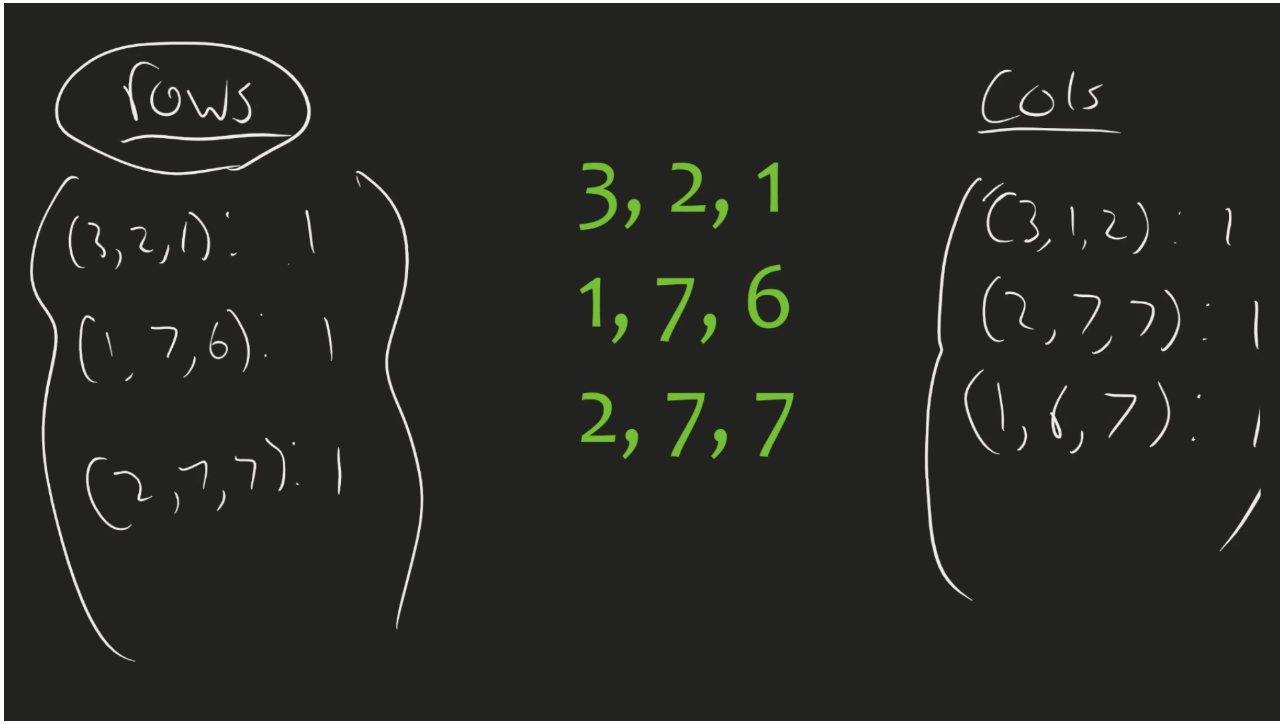

In [11]:
class Solution:
    def equalPairs(self, grid):
        def convert_to_key(arr):
            # since hash key has to be immutable
            return tuple(arr)
        
        # count frequency of rows
        dic = defaultdict(int)
        for row in grid:
            dic[convert_to_key(row)] += 1

        # count frequency of columns
        dic2 = defaultdict(int)
        # lock one column in and iterate through all the rows
        for col in range(len(grid[0])):
            current_col = []
            for row in range(len(grid)):
                current_col.append(grid[row][col])

            dic2[convert_to_key(current_col)] += 1

        ans = 0
        for arr in dic:
            ans += dic[arr] * dic2[arr]
        
        return ans

If the grid has a size of n⋅n, this algorithm has a time complexity of O(n^2) - there are n^2 elements and each element is iterated over twice initially (once for the row it occupies and once for the column it occupies). Populating and then iterating over the hash maps will be dominated by this. The space complexity is O(n^2)- if all rows and columns are unique, then each of the two hash maps will both grow to a size of n, with each key having a length of n.

#### Ransom Note: Given two strings ransomNote and magazine, return true if ransomNote can be constructed by using the letters from magazine and false otherwise. Each letter in magazine can only be used once in ransomNote.



In [12]:
import collections
def canConstruct(self, ransomNote, magazine):
    if len(ransomNote) > len(magazine): 
        return False

    # In Python, we can use the Counter class. It does all the work that the
    # makeCountsMap(...) function in our pseudocode did!
    letters = collections.Counter(magazine)
    
    for c in ransomNote:
        if letters[c] <= 0:
            return False
        letters[c] -= 1

    return True

> O(m) time complexity m being the length of the magazine, and O(1) space complexity as there are 26 alphabets (constant)

#### Jewels and Stones: You're given strings jewels representing the types of stones that are jewels, and stones representing the stones you have. Each character in stones is a type of stone you have. You want to know how many of the stones you have are also jewels. Letters are case sensitive, so "a" is considered a different type of stone from "A".

In [13]:
class Solution:
    def jewlsStones(self, jewels, stones):

        ans = 0
        for c in stones:
            if c in jewels:
                ans += 1
        
        return ans

#### Longest Substring Without Repeating Characters: Given a string s, find the length of the longest substring without repeating characters.

In [14]:
class Solution:
    def longestSubstring(self, s):
        seen = defaultdict(int)
        left = ans = 0

        for right in range(len(s)):
            if s[right] in seen and seen[s[right]] >= left:
                left = seen[s[right]] + 1

            ans = max(ans, right - left + 1)
            seen[s[right]] = right
        
        return ans